In [1912]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [1913]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1914]:
df.shape

(891, 12)

In [1915]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1916]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1917]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [1918]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [1919]:
y_actual=pd.read_csv('gender_submission.csv')
y_actual.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [1920]:
x_test=pd.read_csv('test.csv')
x_test1=x_test.copy()
x_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [1921]:
df[df.Pclass==1].groupby('Ticket').Name.count().nlargest()
# Group ticket.Need to allocate fare cost to each person within the group: Fare/# of group members.

Ticket
113760      4
113781      4
17421       4
19950       4
PC 17757    4
Name: Name, dtype: int64

In [1922]:
df['group']=df['Fare'].groupby(by=df['Ticket']).transform('count')
df['Fare']=df['Fare']/df['group']
df.drop('group',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,26.5500,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1923]:
x_test.Age.fillna(x_test.Age.mean(),inplace=True)
x_test.Fare.fillna(x_test.Fare.mean(),inplace=True)
x_test['group']=x_test['Fare'].groupby(by=x_test['Ticket']).transform('count')
x_test['Fare']=x_test['Fare']/x_test['group']
x_test.drop('group',axis=1,inplace=True)
x_test.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [1924]:
x_test['Sex'].replace('male',1,inplace=True)
x_test['Sex'].replace('female',0,inplace=True)

In [1925]:
x_test['Embarked'].replace('S',0,inplace=True)
x_test['Embarked'].replace('C',1,inplace=True)
x_test['Embarked'].replace('Q',2,inplace=True)
x_test.Embarked.fillna('S',inplace=True)

In [1926]:
df.Embarked.fillna('S',inplace=True)

In [1927]:
x_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0


In [1928]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [1929]:
x_test.shape

(418, 7)

In [1930]:
df. columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1931]:
df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

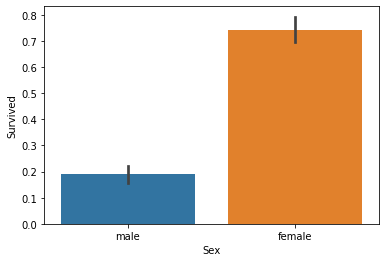

In [1932]:
sns.barplot(x='Sex',y='Survived',data=df)

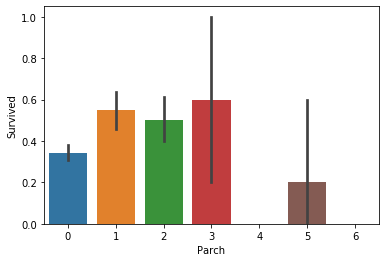

In [1933]:
sns.barplot(x='Parch',y='Survived',data=df)

In [1934]:
df['Parch_group']=df['Parch'].apply(lambda x: 0 if x<1 else 1 if x<4 else 2)

In [1935]:
x_test['Parch_group']=x_test['Parch'].apply(lambda x: 0 if x<1 else 1 if x<4 else 2)

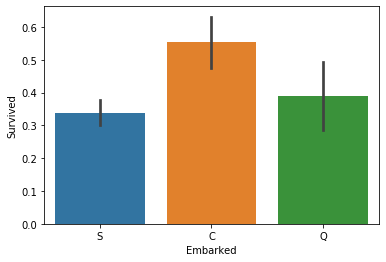

In [1936]:
sns.barplot(x='Embarked',y='Survived',data=df)

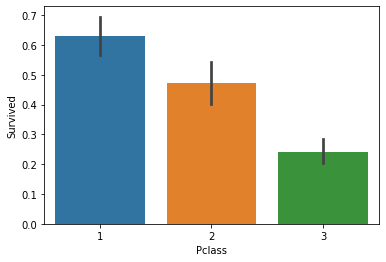

In [1937]:
sns.barplot(x='Pclass',y='Survived',data=df)

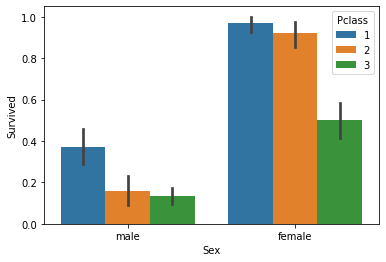

In [1938]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
# Overall: Gender has bigger impact (comparing to class) on survival rate: Female in 3rd class still have a higher survival rate than male in 1st class.
# Within male: 1st class has a much higher survival rate than male in 2nd and 3rd class.
# Within female: 1st and 2nd class have a much higher survival rate than female in 3rd class.

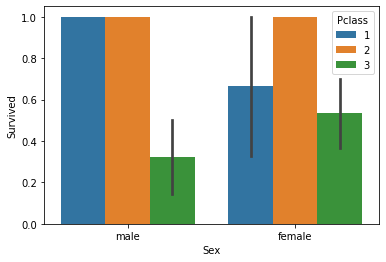

In [1939]:
df_young=df[df.Age<16]
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_young)
#For children/teenagers (Age<12): Class matters the most, rather than gender: Children in 3rd class are less likely to survive.
#Within 3rd class children: Girls are slightly more likely to survive than boys.
#Only one 1st class female kid didn't survive.Difference between 1st(Blue bar) and 2nd class(Orange bar) survival rate is not significant.

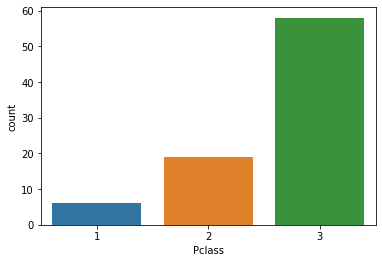

In [1940]:
sns.countplot(df_young.Pclass)
#Most children were in 3rd class, and half of them did not survive.
#Assumption: 3rd class families have more kids.AKA, 3rd class kids have more siblings on board.

In [1941]:
df_young[df_young.Pclass==3].SibSp.mean()
#3rd-class children on board have 2.15 siblings on average.

2.1551724137931036

In [1942]:
df_young[df_young.Pclass!=3].SibSp.mean()
#1st and 2nd-class children on board have only 0.76 siblings on average.

0.76

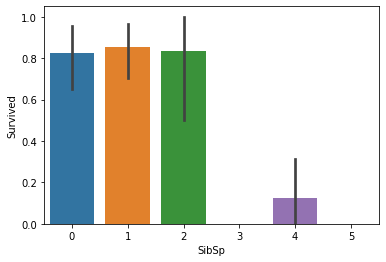

In [1943]:
sns.barplot(x='SibSp',y='Survived',data=df_young)

In [1944]:
len(df_young[df_young.SibSp>2])

27

In [1945]:
df_young[df_young.SibSp>2].Survived.mean()

0.07407407407407407

In [1946]:
df_young[df_young.SibSp>2].Survived.max()

1

In [1947]:
len(df_young[df_young.SibSp<=2])

56

In [1948]:
df_young[df_young.SibSp<=2].Survived.mean()

0.8392857142857143

In [ ]:
# Children who have less than 3 siblings can mostly survive (83.9%).
# Children who have at least 3 siblings almost had zero chance to survive.

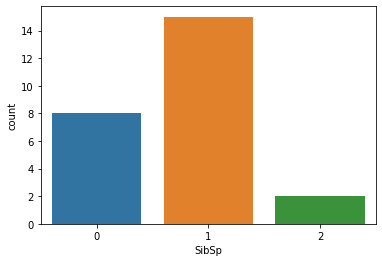

In [1950]:
df_young_12=df_young[df_young.Pclass!=3]
sns.countplot(df_young_12.SibSp)

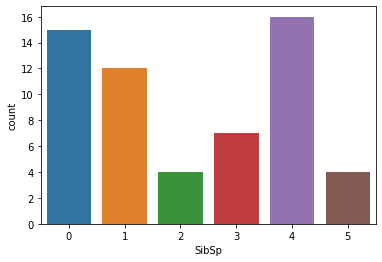

In [1951]:
df_young_3=df_young[df_young.Pclass==3]
sns.countplot(df_young_3.SibSp)
#Children who have at least 3 siblings all came from 3rd class. 

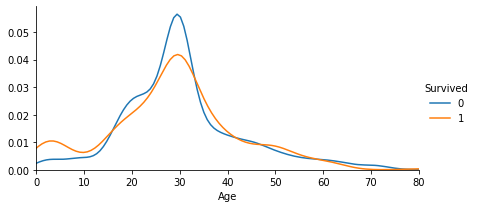

In [1952]:
fac=sns.FacetGrid(df,hue='Survived',aspect=2)
fac.map(sns.kdeplot,'Age')
fac.set(xlim=(0,df.Age.max()))
fac.add_legend()

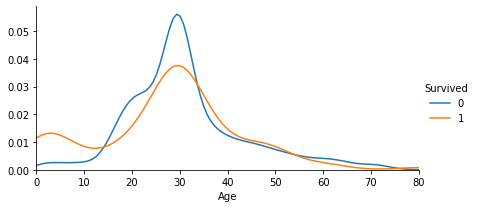

In [1953]:
df_male=df[df.Sex=='male']
fac_male=sns.FacetGrid(df_male,hue='Survived',aspect=2)
fac_male.map(sns.kdeplot,'Age')
fac_male.set(xlim=(0,df.Age.max()))
fac_male.add_legend()

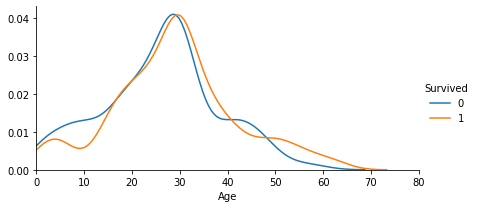

In [1954]:
df_female=df[df.Sex=='female']
fac_female=sns.FacetGrid(df_female,hue='Survived',aspect=2)
fac_female.map(sns.kdeplot,'Age')
fac_female.set(xlim=(0,df.Age.max()))
fac_female.add_legend()
#Children are elders were taken care of.
#Male aged 16-35 survived less. 
#Young male adults sacrificed for children, elders and female.

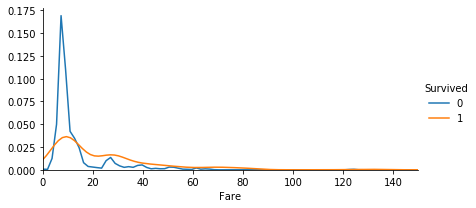

In [1955]:
fac_f=sns.FacetGrid(df,hue='Survived',aspect=2)
fac_f.map(sns.kdeplot,'Fare')
fac_f.set(xlim=(0,150))
fac_f.add_legend()
#Fare>$20 were more likely to survive. 

# Data preparation for Logistic Regression Model

In [1956]:
df['Sex'].replace('male',1,inplace=True)
df['Sex'].replace('female',0,inplace=True)

In [1957]:
df['Embarked'].replace('S',0,inplace=True)
df['Embarked'].replace('C',1,inplace=True)
df['Embarked'].replace('Q',2,inplace=True)

In [1958]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Parch_group
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,0


In [1959]:
df['Underage']=df['Age'].apply(lambda x:1 if x<16 else 0)
df['Sib<2']=df['SibSp'].apply(lambda x: 1 if x<2 else 0)
df['Fare_group']=df['Fare'].apply(lambda x: 1 if x<10 else 1 if x<15 else 2 if x<20 else 3 if x<40 else 4)
df['Young/middle-aged adults']=df['Age'].apply(lambda x: 1 if x>16 and x<35 else 0)
df.drop('Fare',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Parch_group,Underage,Sib<2,Fare_group,Young/middle-aged adults
0,0,3,1,22.0,1,0,0,0,0,1,1,1
1,1,1,0,38.0,1,0,1,0,0,1,4,0
2,1,3,0,26.0,0,0,0,0,0,1,1,1
3,1,1,0,35.0,1,0,0,0,0,1,3,0
4,0,3,1,35.0,0,0,0,0,0,1,1,0


In [1960]:
df['Young/middle-aged male adults']=df['Sex']+df['Young/middle-aged adults']

In [1961]:
df['Young/middle-aged male adults']=df['Young/middle-aged male adults'].apply(lambda x:1 if x==2 else 0)

In [1962]:
df.drop('Young/middle-aged adults',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Parch_group,Underage,Sib<2,Fare_group,Young/middle-aged male adults
0,0,3,1,22.0,1,0,0,0,0,1,1,1
1,1,1,0,38.0,1,0,1,0,0,1,4,0
2,1,3,0,26.0,0,0,0,0,0,1,1,0
3,1,1,0,35.0,1,0,0,0,0,1,3,0
4,0,3,1,35.0,0,0,0,0,0,1,1,0


In [1963]:
df.drop('Age',axis=1,inplace=True)

# Build Logistic Regression Model

In [1964]:
X=df.drop('Survived',axis=1)
Y=df.Survived

In [1965]:
X.shape

(891, 10)

In [1966]:
Y.shape

(891,)

In [1967]:
logisticregression = LogisticRegression(solver = 'lbfgs')  

In [1968]:
logisticregression.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1969]:
logisticregression.score(X,Y)

0.8024691358024691

In [1970]:
x_test['Underage']=x_test['Age'].apply(lambda x:1 if x<16 else 0)
x_test['Sib<2']=x_test['SibSp'].apply(lambda x: 1 if x<2 else 0)
x_test['Fare_group']=x_test['Fare'].apply(lambda x: 1 if x<10 else 1 if x<15 else 2 if x<20 else 3 if x<40 else 4)
x_test['Young/middle-aged adults']=x_test['Age'].apply(lambda x: 1 if x>16 and x<35 else 0)
x_test['Young/middle-aged male adults']=x_test['Sex']+x_test['Young/middle-aged adults']
x_test['Young/middle-aged male adults']=x_test['Young/middle-aged male adults'].apply(lambda x:1 if x==2 else 0)
x_test.drop(['Young/middle-aged adults','Age','Fare'],axis=1,inplace=True)
x_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Parch_group,Underage,Sib<2,Fare_group,Young/middle-aged male adults
0,3,1,0,0,2,0,0,1,1,1
1,3,0,1,0,0,0,0,1,1,0
2,2,1,0,0,2,0,0,1,1,0
3,3,1,0,0,0,0,0,1,1,1
4,3,0,1,1,0,1,0,1,1,0


In [1971]:
y_pred=logisticregression.predict(x_test)

In [1972]:
len(y_pred)

418

In [1973]:
y_test=y_actual.Survived
y_test.shape

(418,)

In [1974]:
from sklearn import metrics

In [1982]:
metrics.accuracy_score(y_test,y_pred)

0.9641148325358851

In [1976]:
metrics.confusion_matrix(y_test,y_pred)

array([[257,   9],
       [  6, 146]], dtype=int64)

In [1977]:
x_test1['Survived']=y_pred
x_test1.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [1983]:
x_test1.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [1984]:
x_test1.to_csv('Titanic6.csv',index=False)

In [ ]:
# Accuracy score from Kaggle: 0.77511